In [20]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [21]:
def euler_pendulum(a, b, y0, f, N=100):
    h = (b - a) / N
    t_values = [a]
    y_values = [y0]

    for i in range(1, N + 1):
        t = a + i * h
        y_prev = y_values[-1]
        y_next = y_prev + h * f(y_prev, t_values[-1])
        y_values.append(y_next)
        t_values.append(t)

    return np.array(t_values), np.array(y_values)


def RK4_pendulum(a, b, y0, f, N=100):
    h = (b - a) / N
    t_values = [a]
    y_values = [y0]

    for i in range(1, N + 1):
        t = a + i * h
        y_prev = y_values[-1]

        k1 = h * f(y_prev, t_values[-1])
        k2 = h * f(y_prev + k1 / 2, t_values[-1] + h / 2)
        k3 = h * f(y_prev + k2 / 2, t_values[-1] + h / 2)
        k4 = h * f(y_prev + k3, t_values[-1] + h)

        y_next = y_prev + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        y_values.append(y_next)
        t_values.append(t)

    return np.array(t_values), np.array(y_values)



\begin{equation}
\frac{d^2y}{dt^2} + \gamma \frac{dy}{dt} + \omega² y =0
\end{equation}


\begin{equation}
\frac{\mathrm{d}y}{\mathrm{d}t} =v
\end{equation}


\begin{equation}
\frac{\mathrm{d}v}{\mathrm{d}t} = - \gamma v - \omega² y
\end{equation}

In [22]:
f=2 #Hz
omega = 2*np.pi*f
alpha = 0.1

def func(y, t):
    position = y[0]
    velocity = y[1]
    dydt = velocity
    dvdt = -alpha*velocity - omega*position
    return np.array([dydt, dvdt])

y0 = np.array([2, 0])
t = np.linspace(0, 10, 100000)
dt2 = 3/10


t_euler, y_euler = euler_pendulum(t[0], t[-1], y0, func, 100000)
t_rk, y_rk = RK4_pendulum(t[0], t[-1], y0, func, 100000)
y_odeint = sp.integrate.odeint(func, y0, t)

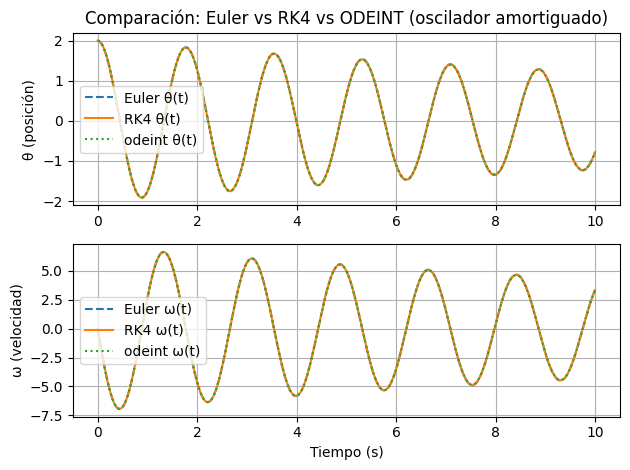

In [23]:
plt.subplot(2, 1, 1)
plt.plot(t_euler, y_euler[:, 0], label="Euler θ(t)", linestyle='--')
plt.plot(t_rk, y_rk[:, 0], label="RK4 θ(t)")
plt.plot(t, y_odeint[:, 0], label="odeint θ(t)", linestyle=':')
plt.ylabel("θ (posición)")
plt.title("Comparación: Euler vs RK4 vs ODEINT (oscilador amortiguado)")
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t_euler, y_euler[:, 1], label="Euler ω(t)", linestyle='--')
plt.plot(t_rk, y_rk[:, 1], label="RK4 ω(t)")
plt.plot(t, y_odeint[:, 1], label="odeint ω(t)", linestyle=':')
plt.xlabel("Tiempo (s)")
plt.ylabel("ω (velocidad)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [28]:
def error(real_val, approx_val):
    return np.abs(approx_val - real_val) 

error_theta_euler = error(y_odeint[:, 0], y_euler[:-1, 0])
error_theta_rk4   = error(y_odeint[:, 0], y_rk[:-1, 0])

error_omega_euler = error(y_odeint[:, 1], y_euler[:-1, 1])
error_omega_rk4   = error(y_odeint[:, 1], y_rk[-1:, 1])


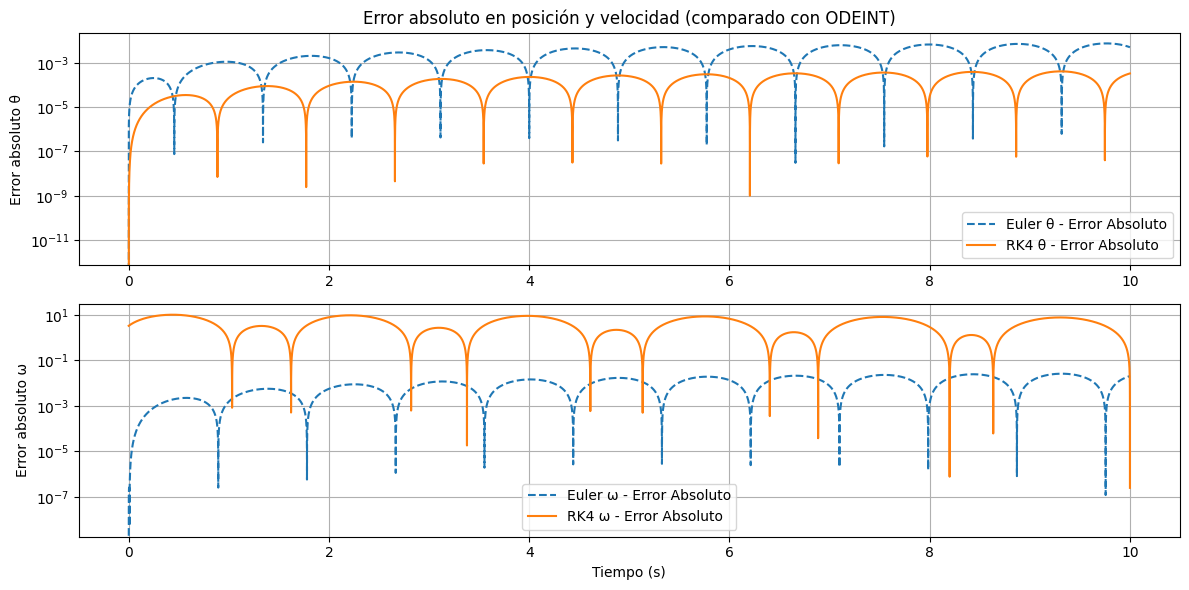

In [31]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, error_theta_euler, label="Euler θ - Error Absoluto", linestyle='--')
plt.plot(t, error_theta_rk4, label="RK4 θ - Error Absoluto")
plt.yscale("log")
plt.ylabel("Error absoluto θ")
plt.title("Error absoluto en posición y velocidad (comparado con ODEINT)")
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, error_omega_euler, label="Euler ω - Error Absoluto", linestyle='--')
plt.plot(t, error_omega_rk4, label="RK4 ω - Error Absoluto")
plt.yscale("log")
plt.xlabel("Tiempo (s)")
plt.ylabel("Error absoluto ω")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
